In [1]:
#옵션사항 넣기
%matplotlib nbagg

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt









In [2]:
# primary : 미국내 주, 카운티별, 정당, 후보자의 득표수 및 득표율 데이터 _ fips:지역번호
primary = pd.read_csv('./data/primary_results.csv')
primary.head()





,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [3]:
primary.shape





(24611, 8)

In [4]:
# counties : 유권자들의 정보
counties = pd.read_csv('./data/county_facts.csv')
counties.head()





,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [5]:
counties.shape





(3195, 54)

In [6]:
# 각 후보의 전체 지역에서의 득표수
# 각 후보의 이름이 중복되지 않게 추출
primary['candidate'].unique()





array(['Bernie Sanders', 'Hillary Clinton', 'Ben Carson', 'Donald Trump',
       'John Kasich', 'Marco Rubio', 'Ted Cruz', ' Uncommitted',
       "Martin O'Malley", 'Carly Fiorina', 'Chris Christie', 'Jeb Bush',
       'Mike Huckabee', 'Rand Paul', 'Rick Santorum', ' No Preference'],
      dtype=object)

In [7]:
# 전체지역 투표수
candidtae_to_votes_s = primary.groupby('candidate')['votes'].sum().sort_values()





<IPython.core.display.Javascript object>


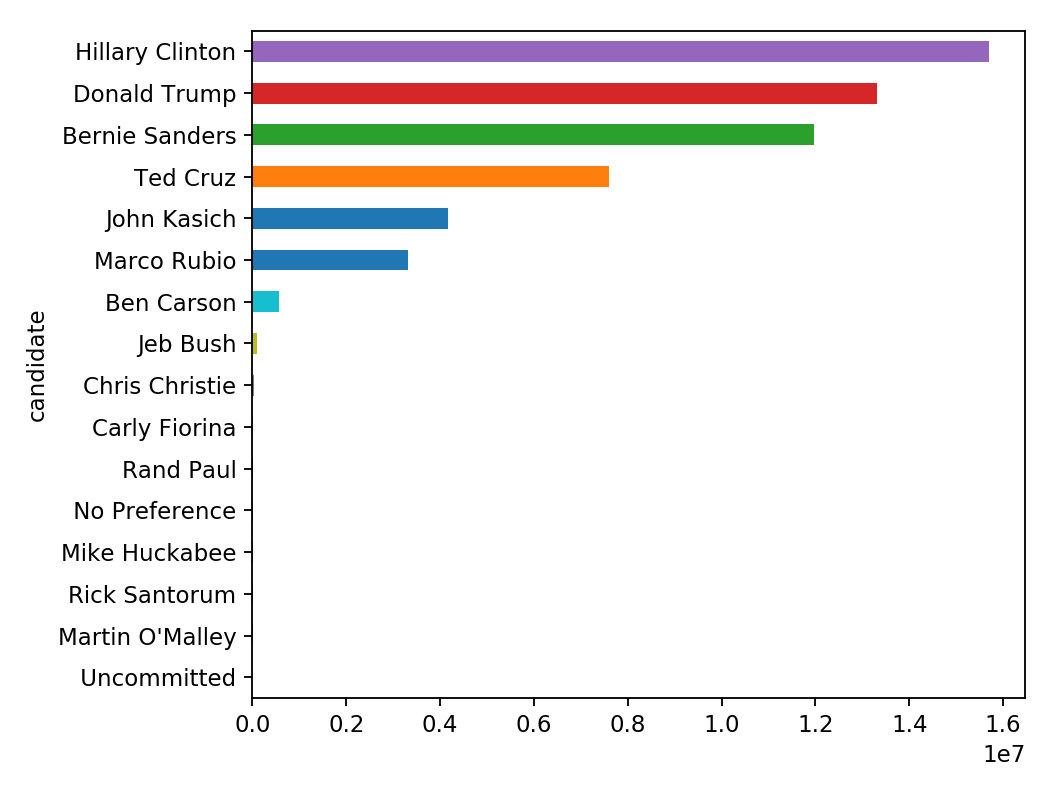

In [8]:
candidtae_to_votes_s.plot(kind='barh')





In [9]:
plt.tight_layout()





In [10]:
# 공화당과 민주당의 각주별 득표비율





In [11]:
primary.head()





,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [12]:
state_party_to_votes_s = primary.groupby(['state','party'])['votes'].sum()
state_party_to_votes_s.head(15)





state        party     
Alabama      Democrat       386327
             Republican     837632
Alaska       Democrat          539
             Republican      21930
Arizona      Democrat       399097
             Republican     435103
Arkansas     Democrat       209448
             Republican     396523
California   Democrat      3442623
             Republican    1495574
Colorado     Democrat       121184
Connecticut  Democrat       322485
             Republican     208817
Delaware     Democrat        92609
             Republican      67807
Name: votes, dtype: int64

In [37]:
# 주별 전체 표수
state_to_votes_s = primary.groupby(['state'])['votes'].sum()

# 주별 정당별 비율
ax1 = state_party_to_votes_s/state_to_votes_s*100
ax1.head()





state    party     
Alabama  Democrat      31.563721
         Republican    68.436279
Alaska   Democrat       2.398861
         Republican    97.601139
Arizona  Democrat      47.841884
Name: votes, dtype: float64

In [43]:
# undstack - 2차 인덱스를 빼낸다? - 민주당 공화당 정보 빼기
ax1=ax1.unstack()





In [54]:
ax1.head()
ax1[(ax1['Democrat']+ax1['Republican'])!=100.0]





party,Democrat,Republican
state,,
Colorado,100.000000,NaN
Hawaii,71.786887,28.213113
Idaho,9.918867,90.081133
Maine,100.000000,NaN
North Dakota,100.000000,NaN
Tennessee,30.455132,69.544868


<IPython.core.display.Javascript object>


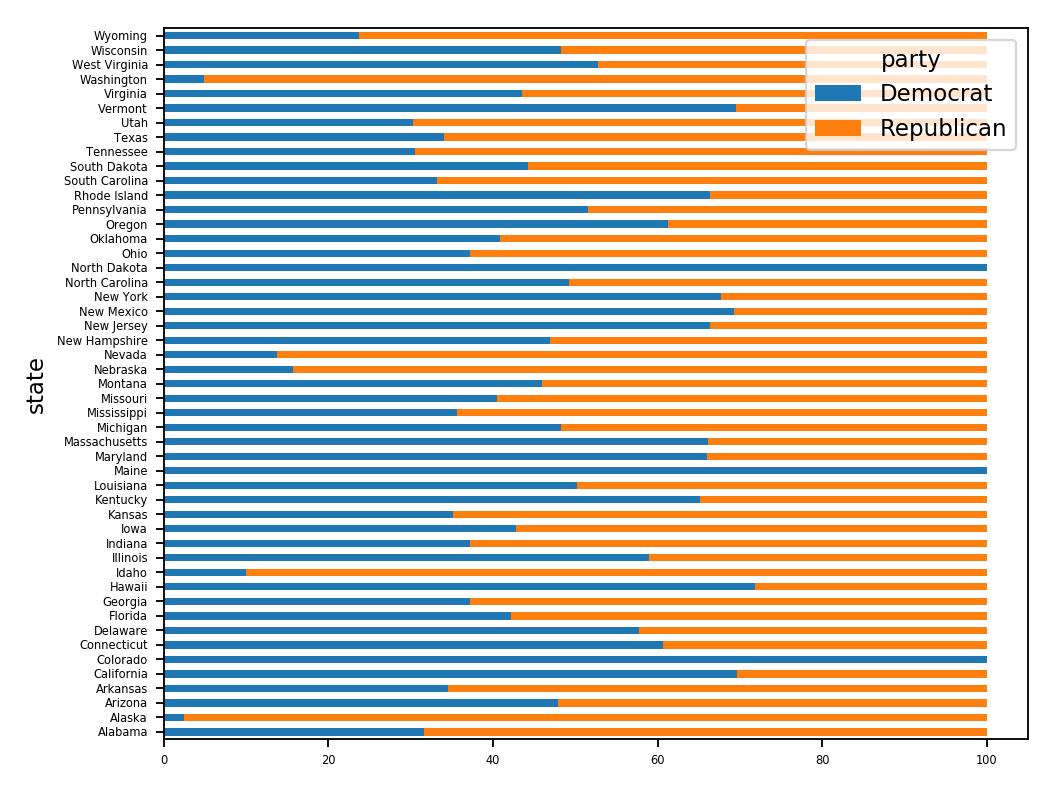

In [16]:
ax1.plot(kind='barh',stacked=True,fontsize=5)





In [55]:
plt.tight_layout()





In [18]:
# 백인 유권자가 많을수록 공화당 후보가 당선될 가능성이 높다? (가설을 세우고 알아보자)





In [19]:
# 내림차순에서 가장 위에 있는 데이터 가져오기 - 표를 가장 많이 받은
func = lambda agg_df: agg_df.sort_values('votes',ascending = False).iloc[0]





In [20]:
# apply에 agg써도된다.
winners = primary.groupby('fips').apply(func)





In [21]:
winners.head()





,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
fips,,,,,,,,
1001.0,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445
1003.0,Alabama,AL,Baldwin,1003.0,Republican,Donald Trump,23618,0.469
1005.0,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
1007.0,Alabama,AL,Bibb,1007.0,Republican,Donald Trump,1959,0.494
1009.0,Alabama,AL,Blount,1009.0,Republican,Donald Trump,7390,0.487


In [22]:
# 백인유권자가 있는 것을 어떻게 알까? winners에 각 county에 백인 유권자 정보 추가하기 -RHI825214 가 백인유권자 비율
counties.columns





Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [23]:
# RHI825214 : 해당 county의 백인 유권자 비율 - 0번이 미국전체 
counties['RHI825214'].head()





0    62.1
1    66.2
2    75.6
3    83.0
4    46.6
Name: RHI825214, dtype: float64

In [24]:
counties.head()





,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [25]:
# winners와 counties를 merge
# winners 의 index와 counties fips를 기준으로 merge
winners_county_races = pd.merge(winners,counties[['fips','RHI825214']],left_index=True, right_on='fips',how='left')
winners_county_races.head()





,fips,state,state_abbreviation,county,fips_x,party,candidate,votes,fraction_votes,fips_y,RHI825214
2,1001.0,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445,1001.0,75.6
3,1003.0,Alabama,AL,Baldwin,1003.0,Republican,Donald Trump,23618,0.469,1003.0,83.0
4,1005.0,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906,1005.0,46.6
5,1007.0,Alabama,AL,Bibb,1007.0,Republican,Donald Trump,1959,0.494,1007.0,74.5
6,1009.0,Alabama,AL,Blount,1009.0,Republican,Donald Trump,7390,0.487,1009.0,87.8


In [26]:
winners_county_races = winners_county_races.rename(columns={'RHI825214':'white_pcts'})
winners_county_races.head()





,fips,state,state_abbreviation,county,fips_x,party,candidate,votes,fraction_votes,fips_y,white_pcts
2,1001.0,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445,1001.0,75.6
3,1003.0,Alabama,AL,Baldwin,1003.0,Republican,Donald Trump,23618,0.469,1003.0,83.0
4,1005.0,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906,1005.0,46.6
5,1007.0,Alabama,AL,Bibb,1007.0,Republican,Donald Trump,1959,0.494,1007.0,74.5
6,1009.0,Alabama,AL,Blount,1009.0,Republican,Donald Trump,7390,0.487,1009.0,87.8


In [27]:
winners_county_white_pcts = winners_county_races.groupby(['party','candidate'])['white_pcts'].mean()





In [28]:
winners_county_white_pcts.head()





party       candidate      
Democrat     No Preference           NaN
            Bernie Sanders     81.220541
            Hillary Clinton    54.609481
Republican  Donald Trump       84.008129
            John Kasich        89.226415
Name: white_pcts, dtype: float64